# Making Maps #

- Distance Problem
- Plotting data on a map
- Adding __features__ to a map (coastlines, country codes, etc)


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature


### Suppose we want to know the distance across Monterey Bay in Kiolmeters ###

Northern Point of the Monterey Penninsula:
-  36°38'28.11"N 121°56'17.29"W

Lighthouse Point Santa Cruz
-  36°57'4.44"N 122° 1'33.90"W


__Identify the problem__
1. Convert units to decimal degrees
2. Convert from lat/lon to UTM
3. What zone are we?
4. How do we calculate the distance between two points on a cartesian plane?

__1. Convert to Decimal Degrees__

In [8]:
pg_lat = 36 + (38 + 28.11/60) / 60
pg_lon = -1 * (121 + (56 + 17.29/60) / 60)

sc_lat = 36 + (57 + 4.44/60) /60
sc_lon = -1 * (122 + (1 + 33.90/60) /60)

Here Sig Fig really matter, they correspond to how accurate our measurment is.

If we can measure poition to a hundredth of a arc-seconds how many meters is that?

- __1 arc-second == ???__ # ~ 30 m
- __1/100 of an arc-scond is == ???__ ~ 10 cm

-122.02608333333333 So how many decimals should we keep? ---> 6 [According to wiki.gis.com](http://wiki.gis.com/wiki/index.php/Decimal_degrees)



In [40]:
pg_lat = round(pg_lat, 6)
pg_lon = round(pg_lon, 6)
sc_lat = round(sc_lat, 6)
sc_lon = round(sc_lon, 6)

In [48]:
pg_lat

36.641142

__2. Convert units to UTM__

__What is the UTM zone for Monterey Bay?__

In [41]:
crs = ccrs.UTM(zone=???)
pg_xy = crs.transform_point(pg_lon,pg_lat,ccrs.PlateCarree())
sc_xy = crs.transform_point(sc_lon,sc_lat,ccrs.PlateCarree())

Plot the points on a cartisian plane

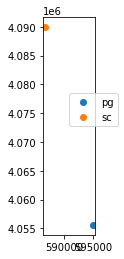

In [42]:
fig, ax = plt.subplots()

ax.scatter(pg_xy[0], pg_xy[1], label='pg')
ax.scatter(sc_xy[0], sc_xy[1], label='sc')

plt.legend(loc=(.5,.5))
ax.set_aspect('equal')

## How do we calculate the distance between two points? ##

HINT:

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/Pythagorean.svg" width=300/>

In [140]:
## Calculate the distance here

### Now, how else could you calculate distance? ###

- Ever notice how when you are on an airplane and the maps shows you flying over a big arc?

The haversine equation gives us an approximation of the __Great Circle__ distance

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Illustration_of_great-circle_distance.svg/1024px-Illustration_of_great-circle_distance.svg.png" width=300>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Central_angle.svg/1024px-Central_angle.svg.png" width=300>

### Or you can find a python package that does all of that for you ###

Checkout: [vincenty on PyPI](https://pypi.org/project/vincenty/)

In [44]:
import vincenty

In [49]:
# Lat/Lon
dist = vincenty.vincenty((pg_lat, pg_lon), (sc_lat, sc_lon), miles=False)
print(dist)

35.2958


In [50]:
error = np.abs(c/1000 - dist)
print(f"Error between two methods {error} km")

Error between two methods 0.010529031323400773 km


### Now lets make that map! ###

- Start by create a figure (this is the same as we have always done)
- Now make an Axes with a projection (we want PlateCaree)
- Just plot the data to make sure everything is working

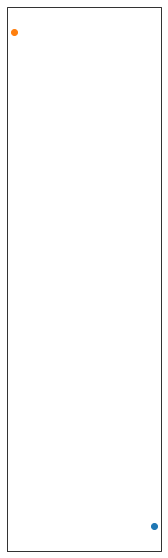

In [53]:
fig = plt.figure()
fig.set_size_inches(10,10)

# Make our axes with a projections
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pg_lon,pg_lat)
ax.scatter(sc_lon,sc_lat)

__This is ugly, so lets add a grid and labels__

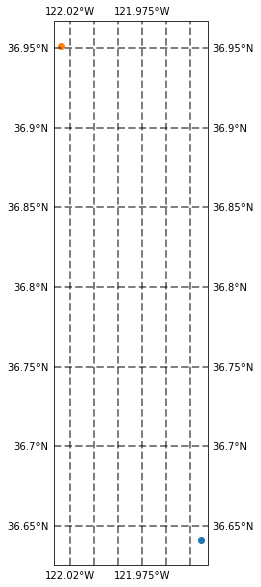

In [54]:
fig = plt.figure()
fig.set_size_inches(10,10)

# Make our axes with a projections
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pg_lon,pg_lat)
ax.scatter(sc_lon,sc_lat)

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)


__Add Coastline__

(36.5, 37.25)

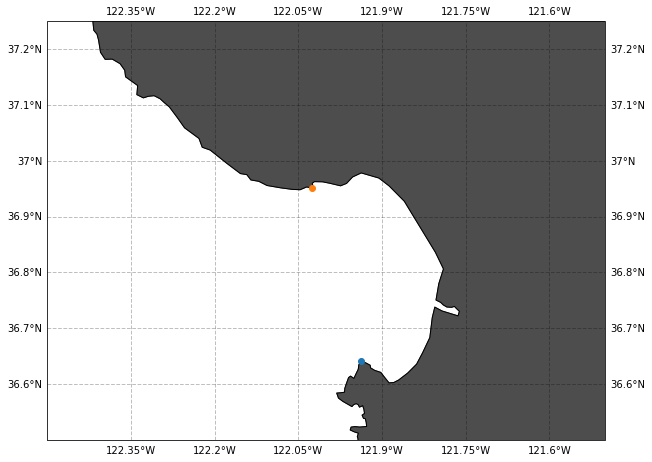

In [71]:
fig = plt.figure()
fig.set_size_inches(10,10)

# Make our axes with a projections
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pg_lon,pg_lat, zorder=200) # zorder sets the order of stacking, so setting it to 200 ensures that it will always be above the coastline or any other thing we draw
ax.scatter(sc_lon,sc_lat, zorder=200)

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.25, linestyle='--', draw_labels=True)

ax.add_feature(cfeature.LAND, facecolor='0.3')
ax.add_feature(cfeature.LAKES, alpha=0.9)  
ax.add_feature(cfeature.BORDERS, zorder=10)
ax.add_feature(cfeature.COASTLINE, zorder=10)

ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',name='populated_places',scale='10m'),zorder=100, edgecolor='k')

ax.set_xlim(-122.5, -121.5)
ax.set_ylim(36.5,37.25)

## Add some cities

Google some cities and find a coordinate

Now suppose we want to add some city data

In [98]:
sc = [-122.0308,36.9741]
pg = [-121.9166, 36.6177]
salinas = [-121.6555, 36.6777]

cities = [sc, pg, salinas]
city_names = ['Santa Cruz', 'Pacific Grove', "Salinas"]


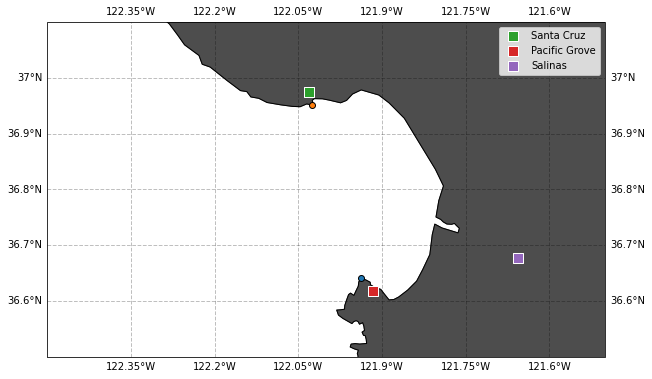

In [117]:
fig = plt.figure()
fig.set_size_inches(10,10)

# Make our axes with a projections
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pg_lon,pg_lat, zorder=200,edgecolors='k') # zorder sets the order of stacking, so setting it to 200 ensures that it will always be above the coastline or any other thing we draw
ax.scatter(sc_lon,sc_lat, zorder=200, edgecolors='k')

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.25, linestyle='--', draw_labels=True)

ax.add_feature(cfeature.LAND, facecolor='0.3')
ax.add_feature(cfeature.LAKES, alpha=0.9, zorder=15,facecolor='b')  
ax.add_feature(cfeature.BORDERS, zorder=10)
ax.add_feature(cfeature.COASTLINE, zorder=10) # Low res. coastline

ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',name='populated_places',scale='10m'),zorder=100, edgecolor='k')

ax.set_xlim(-122.5, -121.5)
ax.set_ylim(36.5,37.1)

### Add Cities
for name, coor in zip(city_names, cities):
    ax.scatter(coor[0], coor[1], label=name, edgecolors='w', marker='s',s=100,zorder=100)
    
plt.legend()

## Save figure ## 

Pay attention to how you are asked to save the figure!!

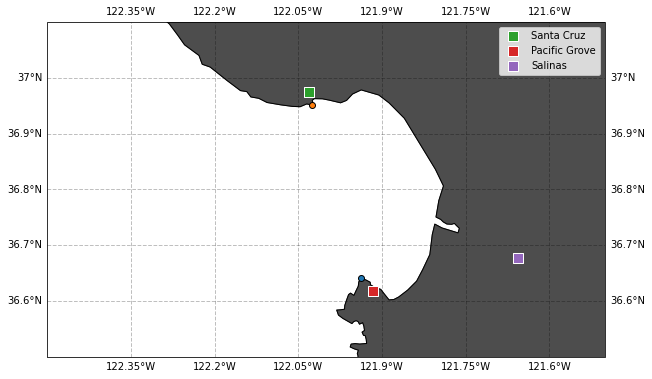

In [118]:
fig = plt.figure()
fig.set_size_inches(10,10)

# Make our axes with a projections
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pg_lon,pg_lat, zorder=200,edgecolors='k') # zorder sets the order of stacking, so setting it to 200 ensures that it will always be above the coastline or any other thing we draw
ax.scatter(sc_lon,sc_lat, zorder=200, edgecolors='k')

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.25, linestyle='--', draw_labels=True)

ax.add_feature(cfeature.LAND, facecolor='0.3')
ax.add_feature(cfeature.LAKES, alpha=0.9, zorder=15,facecolor='b')  
ax.add_feature(cfeature.BORDERS, zorder=10)
ax.add_feature(cfeature.COASTLINE, zorder=10) # Low res. coastline

ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',name='populated_places',scale='10m'),zorder=100, edgecolor='k')

ax.set_xlim(-122.5, -121.5)
ax.set_ylim(36.5,37.1)

### Add Cities
for name, coor in zip(city_names, cities):
    ax.scatter(coor[0], coor[1],label=name, edgecolors='w', marker='s',s=100,zorder=100)
    
plt.legend()

plt.savefig("mbay_pcdaniel.png")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy 
import os
import csv


rows = [] 
with open("World_Cities_Location_table.csv") as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print(header)
print(rows)

['1;"Afghanistan";"Kabul";"34.5166667";"69.1833344";"1808.0"']
[['2;"Afghanistan";"Kandahar";"31.6100000";"65.6999969";"1015.0"'], ['3;"Afghanistan";"Mazar-e Sharif";"36.7069444";"67.1122208";"369.0"'], ['4;"Afghanistan";"Herat";"34.3400000";"62.1899986";"927.0"'], ['5;"Afghanistan";"Jalalabad";"34.4200000";"70.4499969";"573.0"'], ['6;"Afghanistan";"Konduz";"36.7200000";"68.8600006";"394.0"'], ['7;"Afghanistan";"Ghazni";"33.5535554";"68.4268875";"2175.0"'], ['8;"Afghanistan";"Balkh";"36.7586111";"66.8961105";"328.0"'], ['9;"Afghanistan";"Baghlan";"36.1200000";"68.6999969";"565.0"'], ['10;"Afghanistan";"Gardez";"33.5900000";"69.2200012";"2279.0"'], ['11;"Afghanistan";"Khost";"33.3380556";"69.9202805";"1178.0"'], ['12;"Afghanistan";"Khanabad";"36.6800000";"69.1100006";"490.0"'], ['13;"Afghanistan";"Tashqorghan";"36.6952778";"67.6980591";"460.0"'], ['14;"Afghanistan";"Taloqan";"36.7360511";"69.5345078";"788.0"'], ['15;"Afghanistan";"Cool urhajo";"34.2654452";"67.3451614";"2733.0"'], ['16;